In [2]:
import numpy as np
import matplotlib.pyplot as plt

from experiment_framework.empirical_bootstrap import EmpiricalBootstrap, TransformingSampleGenerator, SampleGenerator
from experiment_framework.asymptotic_analysis import construct_bootstrap, transform_n_to_k_for_knn

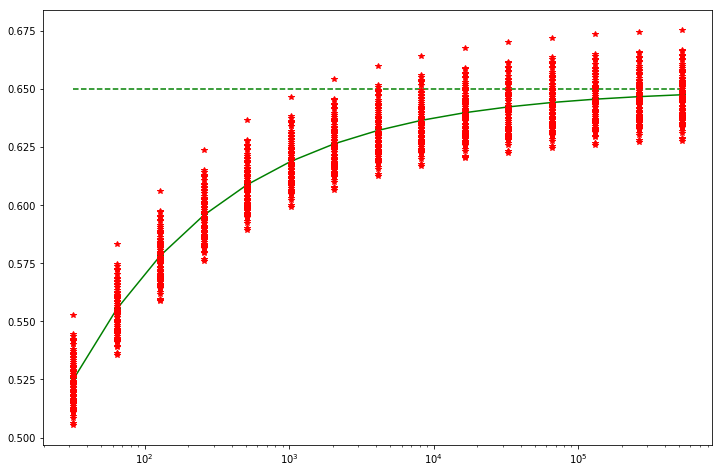

In [21]:
N = np.array([2**i for i in range(5,20)])
m = 0.65
c = -0.5
d = 3
e = -2/(d+2)

def model(n):
    return m + c*n**e

def noise(n):
    return 0.01 * np.random.randn(1)

def noisy_model(n):
    return model(n) + noise(n)

plt.figure(figsize=(12,8))

plt.semilogx(N, model(N), '-*g')
plt.semilogx(N, np.ones_like(N)*m, '--g')
X = N
y = noisy_model(N)
for _ in range(99):
    X = np.vstack((X, N))
    y = np.vstack((y, noisy_model(N)))
_ = plt.semilogx(X, y, '*r')

X = X.astype(np.double)  # for transformation to Ks

In [22]:
EB = construct_bootstrap(X=X, d=3, fit_model='gyorfi', classifier_accuracies=y)

In [23]:
sampled_asymptotes = EB.bootstrap_confidence_bounds(0.99, n_samples=1000)

AttributeError: 'NoneType' object has no attribute 'update'

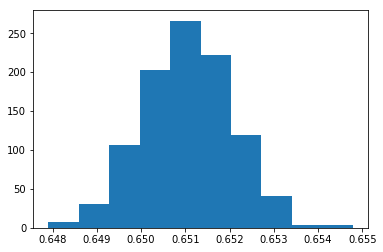

In [27]:
_ = plt.hist(EB.generated_samples)
plt.axvline(sampled_asymptotes.lb_two_sided, '-r')
plt.axvline(sampled_asymptotes.ub_two_sided, '-r')